In [1]:
#import the libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#read the file
df=pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [3]:
#Understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handling null & missing values

In [4]:
#Sum of null value
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null.head()

Null %
Features           
PoolQC        99.52
MiscFeature   96.30
Alley         93.77
Fence         80.75
FireplaceQu   47.26

In [6]:
# dataframe with features having null values
null_df = null[null["Null %"] > 0]
null_df

Null %
Features            
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07

In [7]:
# we will drop the 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'column becuase there are so many missing values and id column is not required
df = df.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [8]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

Null %
Features            
LotFrontage    17.74
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07

In [9]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
 

In [10]:
#Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [11]:
# Numeric columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [12]:
# lets observe the columns with highest percentage of missing values
print('The unique values in columsn with highest number if nan or missing values')
print('\n')
print('LotFrontage: ',df['LotFrontage'].value_counts())
print('\n')
print('GarageCond: ',df['GarageCond'].value_counts())
print('\n')
print('GarageType: ',df['GarageType'].value_counts())
print('\n')
print('GarageYrBlt: ',df['GarageYrBlt'].value_counts())
print('\n')
print('GarageFinish: ',df['GarageFinish'].value_counts())
print('\n')
print('GarageQual: ',df['GarageQual'].value_counts())
print('\n')
print('BsmtExposure: ',df['BsmtExposure'].value_counts())
print('\n')
print('BsmtFinType2: ',df['BsmtFinType2'].value_counts())
print('\n')
print('BsmtFinType1: ',df['BsmtFinType1'].value_counts())
print('\n')
print('BsmtCond: ',df['BsmtCond'].value_counts())
print('\n')
print('BsmtQual: ',df['BsmtQual'].value_counts())
print('\n')
print('MasVnrArea: ',df['MasVnrArea'].value_counts())
print('\n')
print('MasVnrType: ',df['MasVnrType'].value_counts())
print('\n')
print('Electrical: ',df['Electrical'].value_counts())


The unique values in columsn with highest number if nan or missing values


LotFrontage:  60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4


In [13]:
# for the LotFrontage column and GarageYrBlt we will impute the missing values with the median since the feature contains outliers
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

# for the "below columns" we will impute the null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    
    df[col] = df[col].fillna(df[col].mode()[0])
    
# for the "Bsmt" columns we will impute the null values with 'mode'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    
    df[col] = df[col].fillna(df[col].mode()[0])
    
# for the columns we will impute the null values with 'mode'

for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    
    df[col] = df[col].fillna(df[col].mode()[0])

    
#Features	

#GarageYrBlt	 N                            
#LotFrontag   --N

#GarageType	-- C
#GarageCond	 --C
#GarageQual	-- C
#GarageFinish -C
#BsmtExposure -c
#BsmtFinType2 -C
#BsmtFinType1 -C
#BsmtCond	   C
#BsmtQual	   C
#MasVnrArea	   C
#MasVnrType	   C
#Electrical	   C

In [14]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

Empty DataFrame
Columns: [Null %]
Index: []

In [15]:
# checking for the presence of any more null values
df.isnull().values.any()

False

In [16]:
# check Null value
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [17]:
##Now the data is clean
# Check the shape
df.shape

(1460, 75)

In [18]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000


In [19]:
print(df['PoolArea'].value_counts())
print(df['MiscVal'].value_counts())
print(df['3SsnPorch'].value_counts())

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


In [20]:
# we will drop these columns as it dominated by one value and it won't add any extra information to our model
df = df.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [21]:
df.shape

(1460, 72)

In [22]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110    15.060959     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    55.757415     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     8.000000  2009.000000  214000.000000
max     190.000000   313.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  2065.000000    572.000000  5642.000000      3.000000      2.000000     3.000000     2.000000      8.000000      3.000000     14.000000     3.

# EDA & Visualization
##Outliers treatment

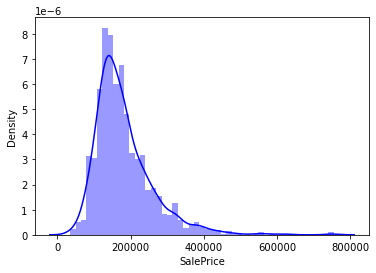

In [23]:
# Sale columns
plt.figure()
sns.distplot(df['SalePrice'],color='b')
plt.show()

In [24]:
# Numeric columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

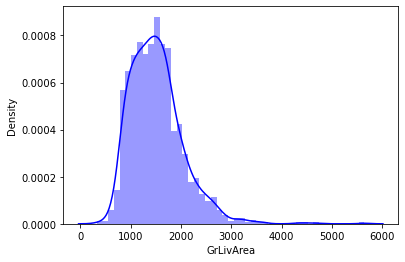

In [25]:
# Sale columns
plt.figure()
sns.distplot(df['GrLivArea'],color='b')
plt.show()

In [26]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] # one or more

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

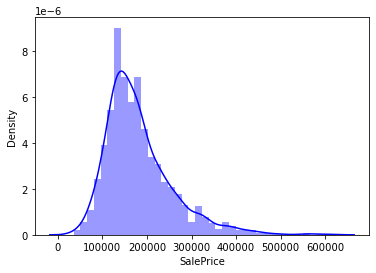

In [27]:
# Sale columns
plt.figure()
sns.distplot(df['SalePrice'],color='b')
plt.show()

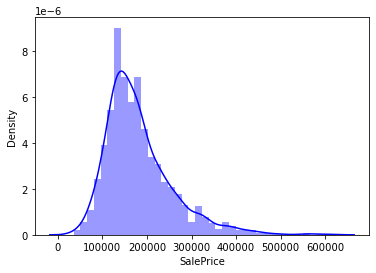

In [28]:
# Sale columns
plt.figure()
sns.distplot(df['SalePrice'],color='b')
plt.show()

In [29]:
df.info()
# Now we have remove some outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1333 non-null   int64  
 1   MSZoning       1333 non-null   object 
 2   LotFrontage    1333 non-null   float64
 3   LotArea        1333 non-null   int64  
 4   Street         1333 non-null   object 
 5   LotShape       1333 non-null   object 
 6   LandContour    1333 non-null   object 
 7   Utilities      1333 non-null   object 
 8   LotConfig      1333 non-null   object 
 9   LandSlope      1333 non-null   object 
 10  Neighborhood   1333 non-null   object 
 11  Condition1     1333 non-null   object 
 12  Condition2     1333 non-null   object 
 13  BldgType       1333 non-null   object 
 14  HouseStyle     1333 non-null   object 
 15  OverallQual    1333 non-null   int64  
 16  OverallCond    1333 non-null   int64  
 17  YearBuilt      1333 non-null   int64  
 18  YearRemo

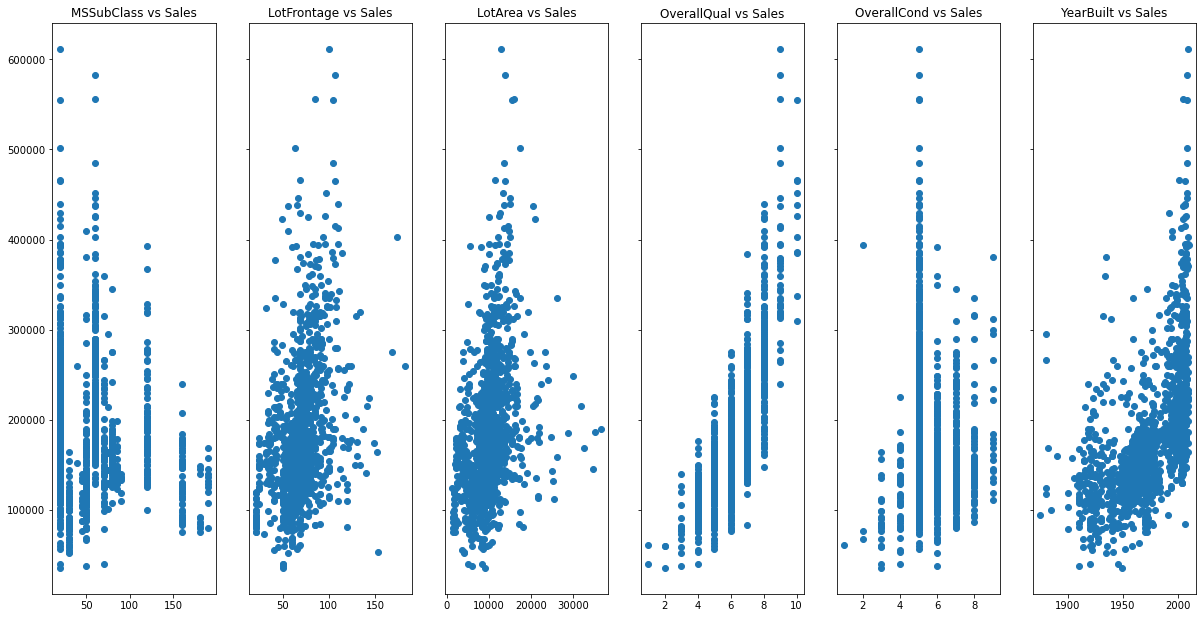

In [30]:
fig, ax = plt.subplots(ncols=6, sharey=True)

MSSubClass = ax[0].scatter(df['MSSubClass'], df['SalePrice'])
MSSubClass.set_label("MSSubClass")
ax[0].set_title('MSSubClass vs Sales')

LotFrontage= ax[1].scatter(df['LotFrontage'], df['SalePrice'])
LotFrontage.set_label("LotFrontage")
ax[1].set_title('LotFrontage vs Sales')

LotArea = ax[2].scatter(df['LotArea'], df['SalePrice'])
LotArea.set_label("LotArea")
ax[2].set_title('LotArea vs Sales')

OverallQual = ax[3].scatter(df['OverallQual'], df['SalePrice'])
OverallQual.set_label("LotArea")
ax[3].set_title('OverallQual vs Sales')

OverallCond = ax[4].scatter(df['OverallCond'], df['SalePrice'])
OverallCond.set_label("OverallCond")
ax[4].set_title('OverallCond vs Sales')

YearBuilt = ax[5].scatter(df['YearBuilt'], df['SalePrice'])
YearBuilt.set_label("YearBuilt")
ax[5].set_title('YearBuilt vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()
#['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
#'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
#'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']

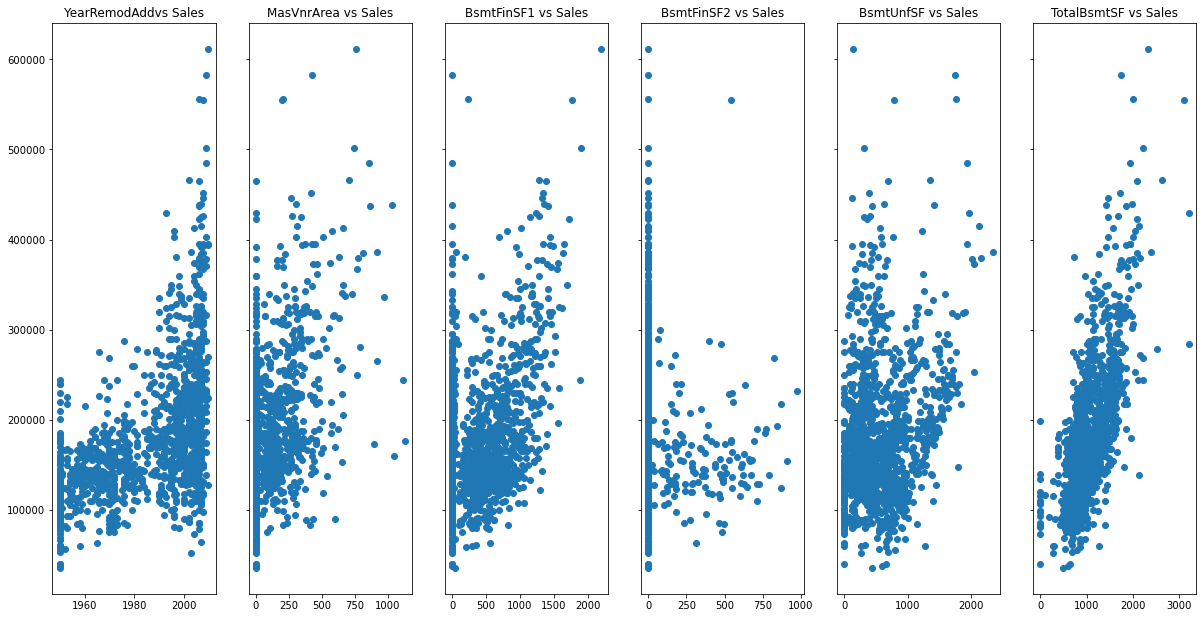

In [31]:
fig, ax = plt.subplots(ncols=6, sharey=True)

YearRemodAdd = ax[0].scatter(df['YearRemodAdd'], df['SalePrice'])
YearRemodAdd.set_label("YearRemodAdd")
ax[0].set_title('YearRemodAddvs Sales')

MasVnrArea= ax[1].scatter(df['MasVnrArea'], df['SalePrice'])
MasVnrArea.set_label("MasVnrArea")
ax[1].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = ax[2].scatter(df['BsmtFinSF1'], df['SalePrice'])
BsmtFinSF1.set_label("BsmtFinSF1")
ax[2].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2 = ax[3].scatter(df['BsmtFinSF2'], df['SalePrice'])
BsmtFinSF2.set_label("BsmtFinSF2")
ax[3].set_title('BsmtFinSF2 vs Sales')

BsmtUnfSF = ax[4].scatter(df['BsmtUnfSF'], df['SalePrice'])
BsmtUnfSF.set_label("BsmtUnfSF")
ax[4].set_title('BsmtUnfSF vs Sales')

TotalBsmtSF = ax[5].scatter(df['TotalBsmtSF'], df['SalePrice'])
TotalBsmtSF.set_label("TotalBsmtSF")
ax[5].set_title('TotalBsmtSF vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()
#['YearRemodAdd', 'MasVnrArea', 
#'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
#'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']

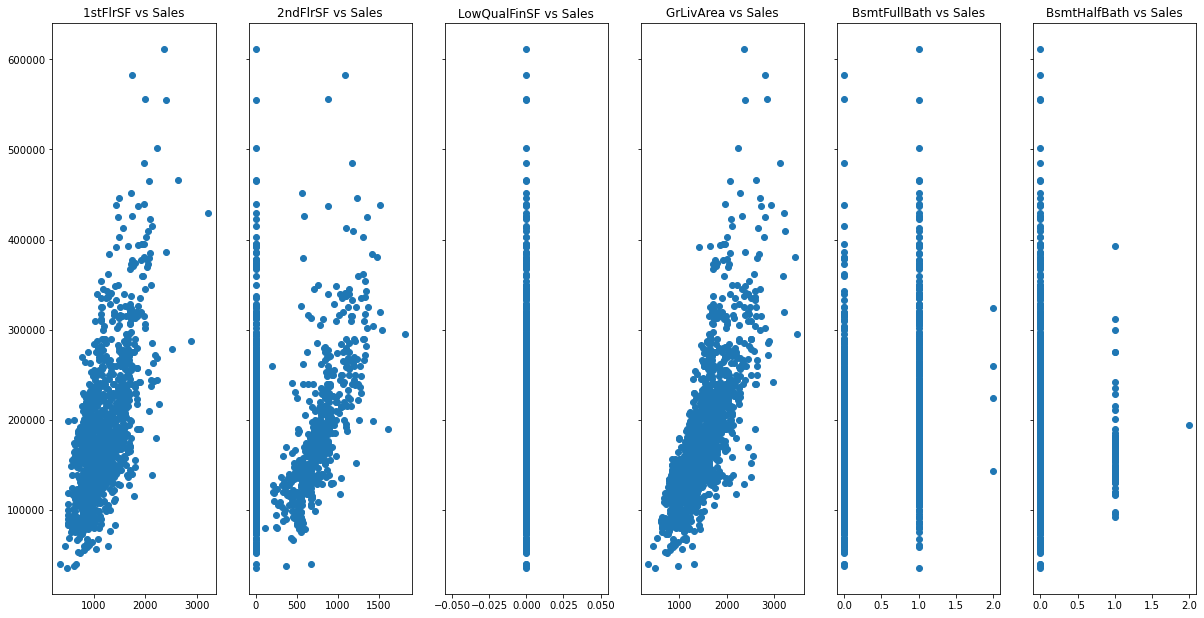

In [32]:
#['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
#'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=6, sharey=True)

stFlrSF = ax[0].scatter(df['1stFlrSF'], df['SalePrice'])
stFlrSF.set_label("1stFlrSF")
ax[0].set_title('1stFlrSF vs Sales')

ndFlrSF= ax[1].scatter(df['2ndFlrSF'], df['SalePrice'])
ndFlrSF.set_label("2ndFlrSF")
ax[1].set_title('2ndFlrSF vs Sales')

LowQualFinSF = ax[2].scatter(df['LowQualFinSF'], df['SalePrice'])
LowQualFinSF.set_label("LowQualFinSF")
ax[2].set_title('LowQualFinSF vs Sales')

GrLivArea = ax[3].scatter(df['GrLivArea'], df['SalePrice'])
GrLivArea.set_label("GrLivArea")
ax[3].set_title('GrLivArea vs Sales')

BsmtFullBath = ax[4].scatter(df['BsmtFullBath'], df['SalePrice'])
BsmtFullBath.set_label("BsmtFullBath")
ax[4].set_title('BsmtFullBath vs Sales')

BsmtHalfBath = ax[5].scatter(df['BsmtHalfBath'], df['SalePrice'])
BsmtHalfBath.set_label("BsmtHalfBath")
ax[5].set_title('BsmtHalfBath vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

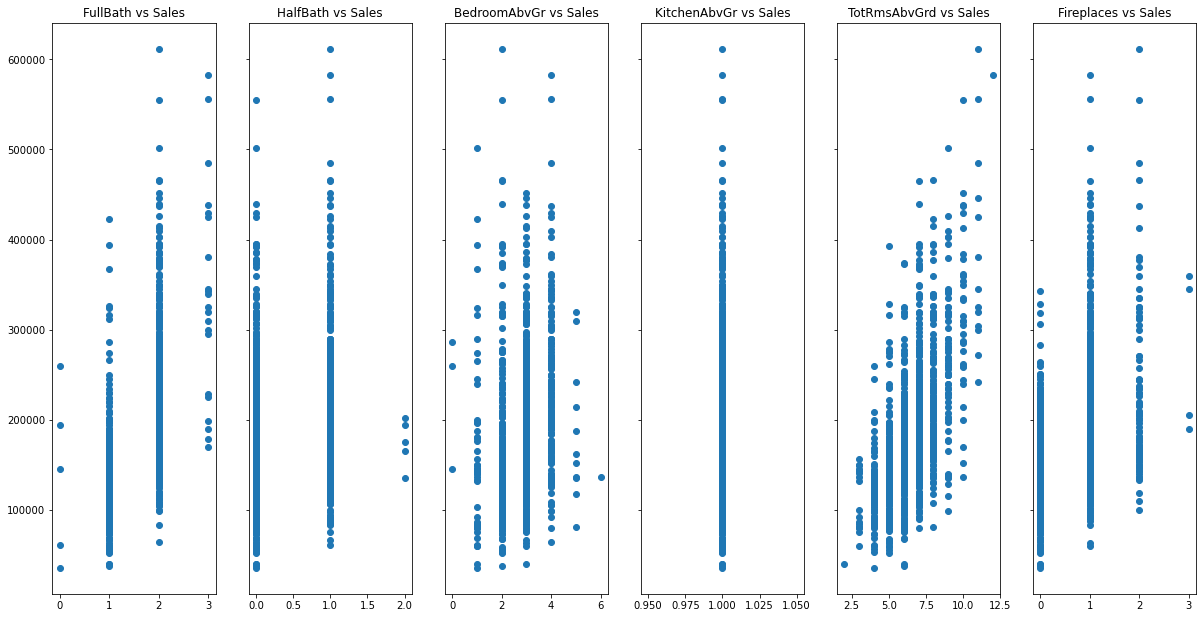

In [33]:
#['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=6, sharey=True)

FullBath = ax[0].scatter(df['FullBath'], df['SalePrice'])
FullBath.set_label("FullBath")
ax[0].set_title('FullBath vs Sales')

HalfBath= ax[1].scatter(df['HalfBath'], df['SalePrice'])
HalfBath.set_label("HalfBath")
ax[1].set_title('HalfBath vs Sales')

BedroomAbvGr = ax[2].scatter(df['BedroomAbvGr'], df['SalePrice'])
BedroomAbvGr.set_label("BedroomAbvGr")
ax[2].set_title('BedroomAbvGr vs Sales')

KitchenAbvGr = ax[3].scatter(df['KitchenAbvGr'], df['SalePrice'])
KitchenAbvGr.set_label("KitchenAbvGr")
ax[3].set_title('KitchenAbvGr vs Sales')

TotRmsAbvGrd = ax[4].scatter(df['TotRmsAbvGrd'], df['SalePrice'])
TotRmsAbvGrd.set_label("TotRmsAbvGrd")
ax[4].set_title('TotRmsAbvGrd vs Sales')

Fireplaces = ax[5].scatter(df['Fireplaces'], df['SalePrice'])
Fireplaces.set_label("Fireplaces")
ax[5].set_title('Fireplaces vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

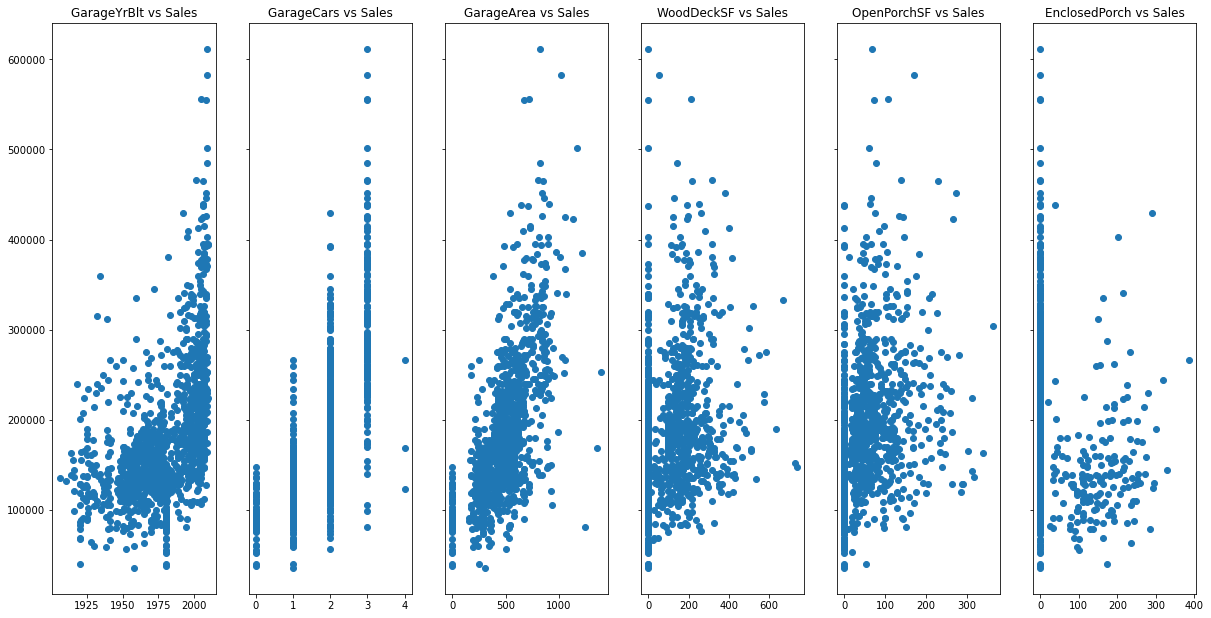

In [34]:
#[GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=6, sharey=True)

GarageYrBlt = ax[0].scatter(df['GarageYrBlt'], df['SalePrice'])
GarageYrBlt.set_label("GarageYrBlt")
ax[0].set_title('GarageYrBlt vs Sales')

GarageCars= ax[1].scatter(df['GarageCars'], df['SalePrice'])
GarageCars.set_label("GarageCars")
ax[1].set_title('GarageCars vs Sales')

GarageArea = ax[2].scatter(df['GarageArea'], df['SalePrice'])
GarageArea.set_label("GarageArea")
ax[2].set_title('GarageArea vs Sales')

WoodDeckSF = ax[3].scatter(df['WoodDeckSF'], df['SalePrice'])
WoodDeckSF.set_label("WoodDeckSF")
ax[3].set_title('WoodDeckSF vs Sales')

OpenPorchSF = ax[4].scatter(df['OpenPorchSF'], df['SalePrice'])
OpenPorchSF.set_label("OpenPorchSF")
ax[4].set_title('OpenPorchSF vs Sales')

EnclosedPorch = ax[5].scatter(df['EnclosedPorch'], df['SalePrice'])
EnclosedPorch.set_label("EnclosedPorch")
ax[5].set_title('EnclosedPorch vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

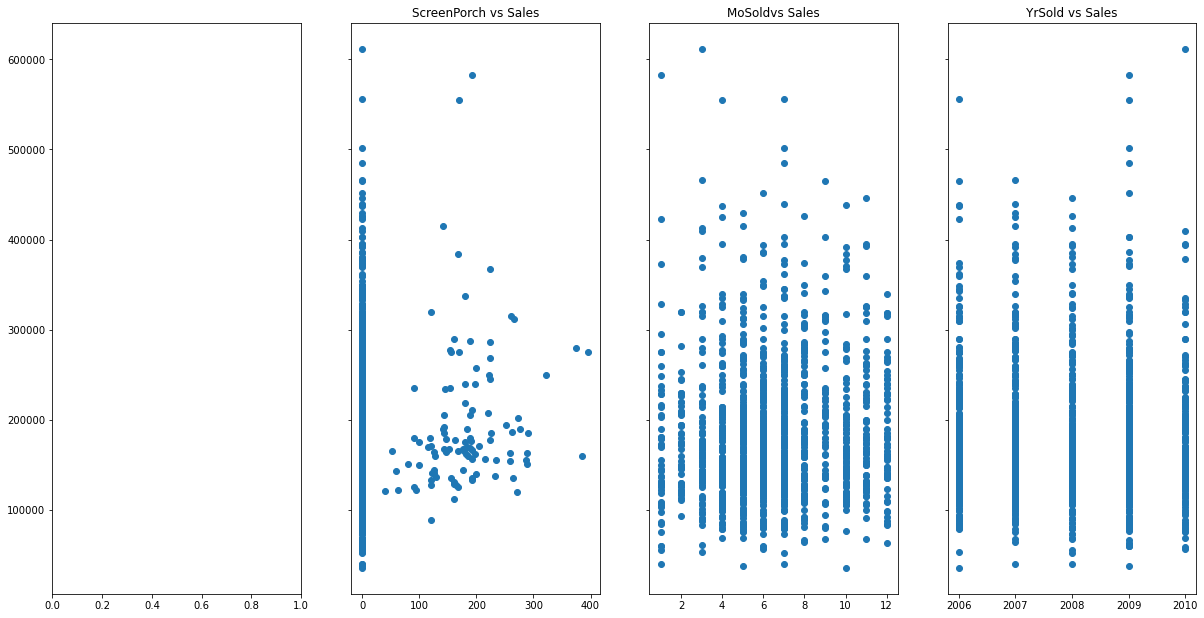

In [35]:
#['ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=4, sharey=True)


ScreenPorch= ax[1].scatter(df['ScreenPorch'], df['SalePrice'])
ScreenPorch.set_label("ScreenPorch")
ax[1].set_title('ScreenPorch vs Sales')

MoSold = ax[2].scatter(df['MoSold'], df['SalePrice'])
MoSold.set_label("MoSold")
ax[2].set_title('MoSoldvs Sales')

YrSold = ax[3].scatter(df['YrSold'], df['SalePrice'])
YrSold.set_label("YrSold")
ax[3].set_title('YrSold vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()


In [36]:
#Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

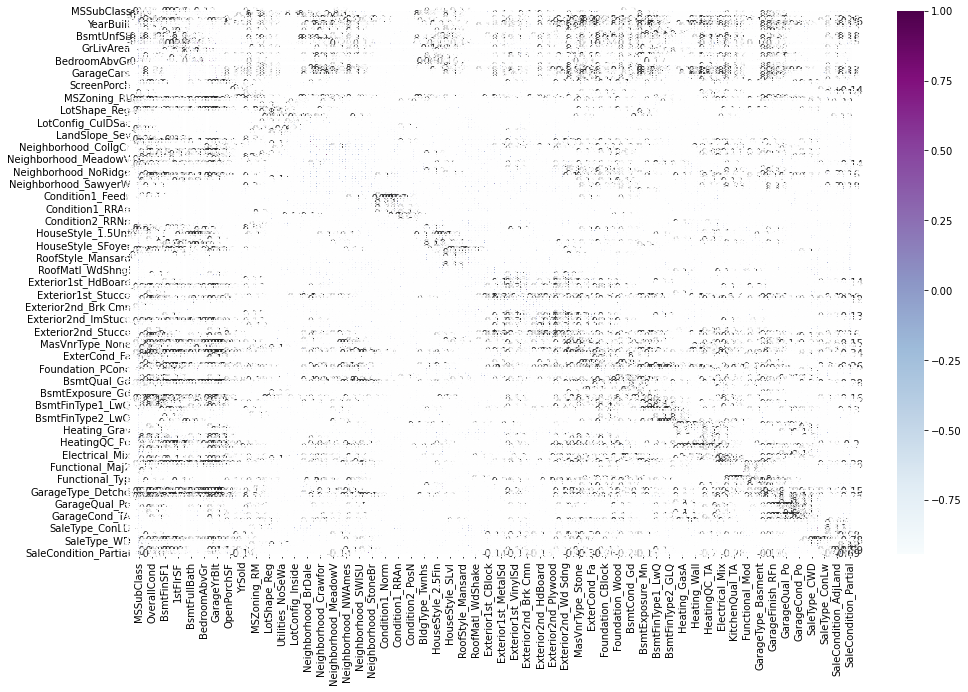

In [125]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="BuPu")
plt.show()

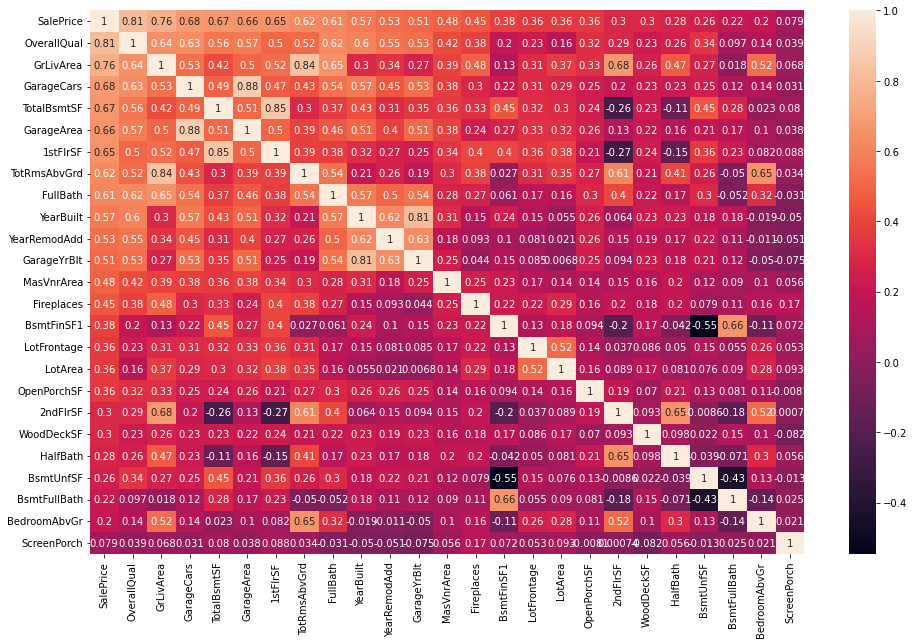

In [38]:
# sales price correlation matrix
plt.figure(figsize = (16, 10))
n = 25 # number of variables which have the highest correlation with 'Sales price'

corrmat = df.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(df[cols].corr(),annot=True)
plt.show()
# OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF are highly correlated to Saleprice

# Dummy Variable

In [39]:
#Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [40]:
# Convert categorical value into Dummy variable
df=pd.get_dummies(df,drop_first=True)
df.head()


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0            0       2    2008     208500            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0            0       5    2007     181500            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0            0       9    2008     223500            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
3          70         60.0     9550        

Splitting the data into train and test sets

In [41]:
#Split the data into train and test
y = df.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [42]:
X = df
X.shape

(1333, 221)

In [43]:
#import train_test_split to split the data
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [45]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
1108          60         69.0     8063            6            5       2000          2000         0.0           0           0        924          924       948       742             0       1690             0             0         2         1             3             1             7           1       2000.0           2         463         100           48              0            0      11    2007            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
745           60         69.0     8963            8            9       1976          1996       289.0         575          80        487         1142      1175      1540             0       2715             0             1         3         1             4             1            11           2       1994.0           2         831           0          204              0            0       7    2008            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    1   
1134          60         57.0     8773            6            5       1997          1997         0.0           0           0        916          916       916       684             0       1600             0             0         2         1             3             1             7           1       1997.0           2         460         100           38              0            0       8    2007            0            0            1            0            1             0             0             0                1                0                0                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
512           20         70.0     9100            5            5       1958   

In [46]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (893, 221)
X_test shape (440, 221)
y_train shape (893,)
y_test shape (440,)


# Scaling of numeric variables

In [47]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
1108          60         69.0     8063            6            5       2000          2000         0.0           0           0        924          924       948       742             0       1690             0             0         2         1             3             1             7           1       2000.0           2         463         100           48              0            0      11    2007            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
745           60         69.0     8963            8            9       1976          1996       289.0         575          80        487         1142      1175      1540             0       2715             0             1         3         1             4             1            11           2       1994.0           2         831           0          204              0            0       7    2008            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    1   
1134          60         57.0     8773            6            5       1997          1997         0.0           0           0        916          916       916       684             0       1600             0             0         2         1             3             1             7           1       1997.0           2         460         100           38              0            0       8    2007            0            0            1            0            1             0             0             0                1                0                0                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
512           20         70.0     9100            5            5       1958   

In [48]:
y_train.head()

1108    181000
745     299800
1134    169000
512     129900
43      130250
Name: SalePrice, dtype: int64

In [49]:
X_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
990           60         82.0     9452            8            5       1997          1998       423.0        1074           0        322         1396      1407       985             0       2392             1             0         2         1             3             1             7           1       1997.0           3         870           0           70              0            0       6    2006            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
1161          20         69.0    14778            6            7       1954          2006        72.0         728           0        568         1296      1640         0             0       1640             1             0         1         0             3             1             7           1       1993.0           2         924         108            0              0            0      11    2008            0            0            1            0            1             0             0             0                0                1                0                 0                  1              0              0                 0              0              0                     0                    0                     0                     0                     0                     1                     0                     0                    0                     0                     0                   0                     0                    0   
1369          20         48.0    10635            8            5       2003          2003       171.0         370         972        315         1657      1668         0             0       1668             1             0         2         0             3             1             8           1       2003.0           2         502           0          262              0            0       5    2010            0            0            1            0            1             1             0             0                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
329           70         60.0     6402            5            5       1920   

In [50]:
y_test.head()

990     348000
1161    224000
1369    232000
329      78000
262     151000
Name: SalePrice, dtype: int64

In [51]:
# columns to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'], dtype='object')

In [52]:
#num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
  #     'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
  #     'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
  #     'EnclosedPorch', 'ScreenPorch']


num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']
X_train[num_vars].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold
1108          60         69.0     8063            6            5       2000          2000         0.0           0           0        924          924       948       742             0       1690             0             0         2         1             3             1             7           1       2000.0           2         463         100           48              0            0      11    2007
745           60         69.0     8963            8            9       1976          1996       289.0         575          80        487         1142      1175      1540             0       2715             0             1         3         1             4             1            11           2       1994.0           2         831           0          204              0            0       7    2008
1134          60         57.0     8773            6            5       1997          1997         0.0           0           0        916          916       916       684             0       1600             0             0         2         1             3             1             7           1       1997.0           2         460         100           38              0            0       8    2007
512           20         70.0     9100            5            5       1958          1958         0.0         521         174        169          864       864         0             0        864             1             0         1         0             3             1             5           0       1964.0           2         624           0            0              0            0       7    2006
43            20         69.0     9200            5            6       1975          1980         0.0         280         491        167          938       938         0             0        938             1             0         1         0             3             1             5           0       1977.0           1         308         145            0              0            0       7    2008

In [53]:
X_train.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch      MoSold       YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
count  893.000000   893.000000    893.000000   893.000000   893.000000   893.000000    893.000000   893.000000   893.000000  893.000000   893.000000   893.000000   893.000000   893.000000         893.0   893.000000    893.000000    893.000000  893.000000  893.000000    893.000000         893.0    893.000000  893.000000   893.000000  893.000000   893.000000  893.000000   893.000000     893.000000   893.000000  893.000000   893.000000   893.000000   893.000000   893.000000   893.000000   893.000000    893.000000    893.000000    893.000000       893.000000       893.000000       893.000000        893.000000         893.000000     893.000000     893.000000        893.000000     893.000000     893.000000            893.000000           893.000000            893.000000            893.000000            893.000000            893.000000            893.000000            893.000000           893.000000            893.000000            893.000000          893.000000            893.000000   
mean    54.048152    69.053751   9759.436730     6.106383     5.592385  1973.202688   1985.810750   103.936170   447.098544   40.530795   565.750280  1053.379619  1151.615901   330.269877           0.0  1481.885778      0.424412      0.059351    1.536394    0.389698      2.807391           1.0      6.406495    0.628219  1979.026876    1.791713   480.303471   93.045913    45.377380      22.340426    13.297872    6.235162  2007.835386     0.047032     0.006719     0.800672     0.137738     0.995521      0.024636      0.007839      0.630459         0.034714         0.022396         0.905935          0.001120           0.063830       0.034714       0.004479          0.722284       0.048152       0.006719              0.001120             0.015677              0.032475              0.017917              0.103024              0.034714              0.063830              0.062710             0.021277              0.012318              0.032475            0.160134              0.006719   
std     41.427593    20.190944   4319.264419     1.325371     1.100157    28.810699     20.471598   174.825318   432.015255  138.048264   430.003172   405.279188   367.601036   419.734605           0.0   476.069639      0.501285      0.241107    0.537878    0.497060      0.732701           0.0      1.483634    0.634021    23.716878    0.700143   204.326074  122.495452    60.239487      61.231097    48.576955    2.728075     1.347977     0.211827     0.081739     0.399719     0.344818     0.066815      0.155100      0.088238      0.482951         0.183158         0.148052         0.292083          0.033464           0.244586       0.183158       0.066815          0.448123       0.214208       0.081739              0.033464             0.124294              0.177357              0.132725              0.304160              0.183158              0.244586              0.242576             0.144386              0.110363              0.177357            0.366936              0.081739   
min     20.000000    21.000

In [54]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
1108          60         69.0     8063            6            5       2000          2000         0.0           0           0        924          924       948       742             0       1690             0             0         2         1             3             1             7           1       2000.0           2         463         100           48              0            0      11    2007            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
745           60         69.0     8963            8            9       1976          1996       289.0         575          80        487         1142      1175      1540             0       2715             0             1         3         1             4             1            11           2       1994.0           2         831           0          204              0            0       7    2008            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    1   
1134          60         57.0     8773            6            5       1997          1997         0.0           0           0        916          916       916       684             0       1600             0             0         2         1             3             1             7           1       1997.0           2         460         100           38              0            0       8    2007            0            0            1            0            1             0             0             0                1                0                0                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
512           20         70.0     9100            5            5       1958   

In [55]:
#Scaling using MinMax
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler()

In [56]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [57]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
1108    0.235294     0.298137  0.187723     0.555556        0.500   0.932836      0.833333    0.000000    0.000000    0.000000   0.395548     0.288210  0.170306  0.460583           0.0   0.407819           0.0           0.0  0.666667       0.5      0.500000           0.0      0.444444    0.333333         0.90        0.50    0.333094    0.135870     0.131868            0.0          0.0  0.909091    0.25            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
745     0.235294     0.298137  0.213431     0.777778        1.000   0.753731      0.766667    0.255979    0.262797    0.088300   0.208476     0.356207  0.252911  0.955928           0.0   0.753286           0.0           0.5  1.000000       0.5      0.666667           0.0      0.888889    0.666667         0.84        0.50    0.597842    0.000000     0.560440            0.0          0.0  0.545455    0.50            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    1   
1134    0.235294     0.223602  0.208004     0.555556        0.500   0.910448      0.783333    0.000000    0.000000    0.000000   0.392123     0.285714  0.158661  0.424581           0.0   0.377486           0.0           0.0  0.666667       0.5      0.500000           0.0      0.444444    0.333333         0.87        0.50    0.330935    0.135870     0.104396            0.0          0.0  0.636364    0.25            0            0            1            0            1             0             0             0                1                0                0                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
512     0.000000     0.304348  0.217344     0.444444        0.500 

In [58]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
990     0.235294     0.378882  0.227399     0.777778         0.50   0.910448      0.800000    0.374668    0.490859    0.000000   0.137842     0.435434  0.337336  0.611421           0.0   0.644422           0.5           0.0  0.666667       0.5           0.5           0.0      0.444444    0.333333         0.87        0.75    0.625899    0.000000     0.192308       0.000000          0.0  0.454545    0.00            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
1161    0.000000     0.298137  0.379531     0.555556         0.75   0.589552      0.933333    0.063773    0.332724    0.000000   0.243151     0.404242  0.422125  0.000000           0.0   0.390967           0.5           0.0  0.333333       0.0           0.5           0.0      0.444444    0.333333         0.83        0.50    0.664748    0.146739     0.000000       0.000000          0.0  0.909091    0.50            0            0            1            0            1             0             0             0                0                1                0                 0                  1              0              0                 0              0              0                     0                    0                     0                     0                     0                     1                     0                     0                    0                     0                     0                   0                     0                    0   
1369    0.000000     0.167702  0.261190     0.777778         0.50   0.955224      0.883333    0.151461    0.169104    1.072848   0.134846     0.516843  0.432314  0.000000           0.0   0.400404           0.5           0.0  0.666667       0.0           0.5           0.0      0.555556    0.333333         0.93        0.50    0.361151    0.000000     0.719780       0.000000          0.0  0.363636    1.00            0            0            1            0            1             1             0             0                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
329     0.294118     0.242236  0.140278     0.444444         0.50 

In [59]:
X_train.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch      MoSold      YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
count  893.000000   893.000000  893.000000   893.000000   893.000000  893.000000    893.000000  893.000000  893.000000  893.000000  893.000000   893.000000  893.000000  893.000000         893.0  893.000000    893.000000    893.000000  893.000000  893.000000    893.000000         893.0    893.000000  893.000000   893.000000  893.000000  893.000000  893.000000   893.000000     893.000000   893.000000  893.000000  893.000000   893.000000   893.000000   893.000000   893.000000   893.000000    893.000000    893.000000    893.000000       893.000000       893.000000       893.000000        893.000000         893.000000     893.000000     893.000000        893.000000     893.000000     893.000000            893.000000           893.000000            893.000000            893.000000            893.000000            893.000000            893.000000            893.000000           893.000000            893.000000            893.000000          893.000000            893.000000   
mean     0.200283     0.298471    0.236180     0.567376     0.574048    0.732856      0.596846    0.092060    0.204341    0.044736    0.242188     0.328565    0.244402    0.205009           0.0    0.337676      0.212206      0.029675    0.512131    0.194849      0.467898           0.0      0.378499    0.209406     0.690269    0.447928    0.345542    0.126421     0.124663       0.057877     0.033580    0.475924    0.458847     0.047032     0.006719     0.800672     0.137738     0.995521      0.024636      0.007839      0.630459         0.034714         0.022396         0.905935          0.001120           0.063830       0.034714       0.004479          0.722284       0.048152       0.006719              0.001120             0.015677              0.032475              0.017917              0.103024              0.034714              0.063830              0.062710             0.021277              0.012318              0.032475            0.160134              0.006719   
std      0.243692     0.125410    0.123376     0.147263     0.137520    0.215005      0.341193    0.154850    0.197448    0.152371    0.184077     0.126413    0.133770    0.260543           0.0    0.160455      0.250643      0.120554    0.179293    0.248530      0.122117           0.0      0.164848    0.211340     0.237169    0.175036    0.146997    0.166434     0.165493       0.158630     0.122669    0.248007    0.336994     0.211827     0.081739     0.399719     0.344818     0.066815      0.155100      0.088238      0.482951         0.183158         0.148052         0.292083          0.033464           0.244586       0.183158       0.066815          0.448123       0.214208       0.081739              0.033464             0.124294              0.177357              0.132725              0.304160              0.183158              0.244586              0.242576             0.144386              0.110363              0.177357            0.366936              0.081739   
min      0.000000     0.000000    0.000000     0.000000     0.000000   

In [60]:
X_train.shape

(893, 221)

# Model Building and Evaluation

# we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

RFE Recursive feature Elimination

In [63]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [71]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [72]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 4),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 6),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 4),
 ('HalfBath', False, 6),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 6),
 ('GarageYrBlt', False, 5),
 ('GarageCars', True, 1),
 ('GarageArea', False, 5),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 5),
 ('ScreenPorch', True, 1),
 ('MoSold', False, 6),
 ('YrSold', False, 5),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True

In [73]:
col = X_train.columns[rfe.support_]
col
# Extract the top features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth', 'SaleCondition_Alloca', 'SaleCondition_Family'], dtype='object', length=110)

In [74]:
X_train.columns[~rfe.support_]
# Extract the non-important features

Index(['YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'EnclosedPorch', 'MoSold',
       ...
       'Functional_Sev', 'GarageFinish_RFn', 'GarageFinish_Unf', 'PavedDrive_Y', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=111)

In [75]:
#Check the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(893, 110)
(440, 110)
(893,)
(440,)


In [76]:
lm1=lm.fit(X_train, y_train)

In [77]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

-6790770728515047.0
[-1.59105609e+04  1.29891170e+04  3.98200667e+04  5.38108179e+04
  4.42033528e+04  3.62062963e+04  6.12032595e+03  1.87966440e+04
 -5.12748682e+16 -2.12317325e+16 -5.47431866e+16  7.51312740e+16
 -7.94143472e+16 -4.65562276e+16 -2.02201777e+17  8.57432198e+16
  1.72650000e+03 -5.87275000e+03  9.51187500e+03  1.66500000e+03
 -3.52032500e+04  2.16959651e+16  2.88215000e+04  8.51750000e+02
 -5.38175000e+03  1.96641250e+04 -3.94275000e+03  1.08215000e+04
  1.09345000e+04  5.73300000e+03  2.30423438e+04  1.37000000e+02
 -3.09200000e+03  3.87090000e+04  3.15913750e+04  2.58500000e+04
  1.72130000e+04  4.71160000e+04  2.52578125e+02 -5.38418945e+03
  2.17562500e+03  1.26537500e+04 -1.22350625e+04  3.51100000e+03
 -4.59837500e+04  7.38600000e+03 -5.92318750e+03 -1.40526797e+04
 -2.52400000e+03  3.25125000e+02 -4.61117500e+04  1.45068750e+04
  7.47500000e+03 -7.28100000e+03 -1.93051250e+04 -1.15272188e+04
  7.42700000e+03 -2.10178750e+04 -1.35375000e+04 -1.39462500e+04
 -8.9

In [78]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [79]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9332496905293768
-7.05707044033318e+20
337444063188.0
1.7560541427221153e+33
377876890.4680851
3.991032142550262e+30


# Ridge and Lasso Regression

In [80]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Ridge

In [81]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 2.0}
-15949.449578323047


optimum value of alpha is 2

In [83]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([-19563.36273224,  12649.22268342,  29912.2211297 ,  62587.46602379,
        40242.18043818,  35626.06436034,  23424.64282536,  53537.59333346,
         8627.09809899,   6029.88337737,  43369.37388048,  66508.29094951,
        38477.23425766,      0.        ,  82491.27331255, -29147.95777701,
            0.        ,  38336.13189753,  22441.20890245,   9533.54613558,
        15002.94933453,  18320.99701456,  27589.50380568,   9684.10824011,
        16671.97699921,   7186.81990621,  36957.83828883,   9488.88445054,
       -11641.28781336, -18223.31774904, -18447.58009233,  -6365.79759941,
        -9486.35732645,  -8032.46424485, -12202.17139828, -11766.47031192,
        17284.73396632,  24973.45442207,  37846.08137384,  -7035.88539235,
         9250.99057791,  16905.21337162, -12238.11597737,   9187.38231782,
        -6930.23860676,  11446.31584891,      0.        ,   6554.04887368,
        -6184.85859698,   1058.72841769,  -4536.36789565,   2874.96469939,
        14423.12551136,  

In [84]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9280382312706593
0.9140860455669467
363789648719.3197
213784964845.38336
407379225.88949573
485874920.103144


# Lasso

In [85]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 50}
-16221.553573816194


In [88]:
alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=50)

In [89]:
lasso.coef_

array([-2.00763197e+04,  1.02145246e+04,  3.00066087e+04,  7.32020128e+04,
        4.32018338e+04,  3.85357714e+04,  1.97753734e+04,  4.82032120e+04,
        3.79370738e+03,  0.00000000e+00,  4.24164928e+04,  1.11034672e+04,
        0.00000000e+00,  0.00000000e+00,  1.71886057e+05, -3.37123991e+04,
        0.00000000e+00,  2.90939517e+04,  2.00570468e+04,  7.07735121e+03,
        1.10677288e+04,  1.52432839e+04,  1.92720826e+04,  0.00000000e+00,
        7.86015853e+03,  0.00000000e+00,  4.21376398e+04,  7.83024546e+03,
       -1.18327242e+04, -2.13943094e+03, -1.51411590e+04, -2.10347783e+03,
       -6.61966095e+03, -6.53246563e+03, -9.83400426e+03, -1.05526067e+04,
        1.53521440e+04,  2.50886189e+04,  4.01623743e+04, -2.16233192e+02,
        9.65750369e+03,  1.20525876e+04, -7.54208732e+03,  0.00000000e+00,
       -0.00000000e+00,  8.83154114e+03,  0.00000000e+00,  5.43666402e+03,
       -8.58111761e+02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [90]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9253030504972655
0.9154469352740864
377616858226.62396
210398579477.3811
422863223.09812313
478178589.7213207


In [91]:
metric2

[0.9280382312706593,
 0.9140860455669467,
 363789648719.3197,
 213784964845.38336,
 20183.637578233902,
 22042.57063282647]

In [92]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.332497e-01      9.280382e-01      9.253031e-01
1   R2 Score (Test)      -7.057070e+20      9.140860e-01      9.154469e-01
2       RSS (Train)       3.374441e+11      3.637896e+11      3.776169e+11
3        RSS (Test)       1.756054e+33      2.137850e+11      2.103986e+11
4       MSE (Train)       1.943906e+04      2.018364e+04      2.056364e+04
5        MSE (Test)       1.997757e+15      2.204257e+04      2.186729e+04

# Model Evaluation
The r2_score of lasso is slightly higher than ridge for the test dataset

In [93]:
ridge_pred = ridge.predict(X_test1)

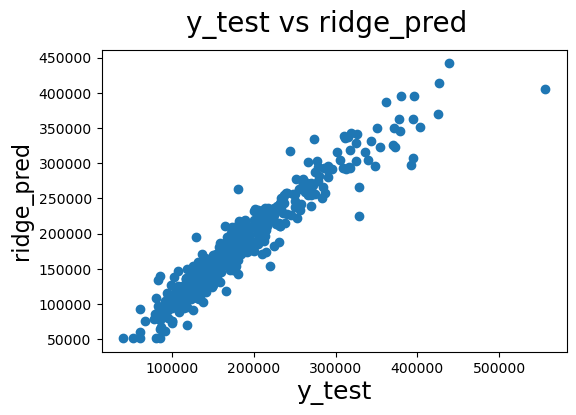

In [94]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

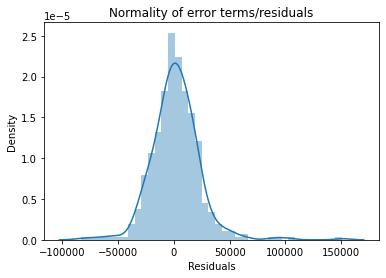

In [95]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [96]:
lasso_pred = lasso.predict(X_test1)

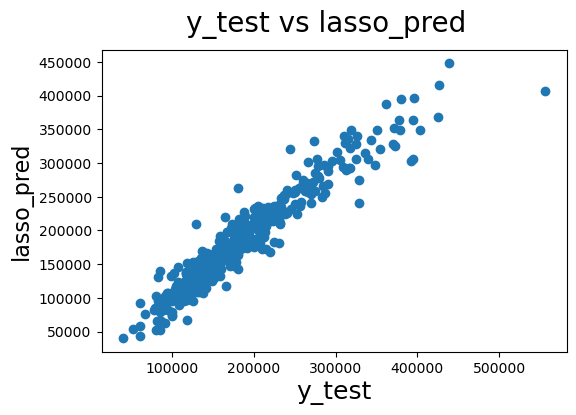

In [97]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

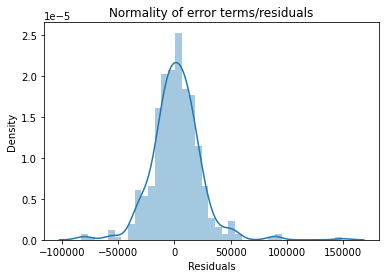

In [98]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

# Lets observe the changes in the coefficients after regularization

In [99]:
betas = pd.DataFrame(index=X_train1.columns)

In [100]:
betas.rows = X_train1.columns

In [101]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [102]:
pd.set_option('display.max_rows', None)
betas.head(68)


Ridge          Lasso
MSSubClass           -19563.362732  -20076.319714
LotFrontage           12649.222683   10214.524570
LotArea               29912.221130   30006.608700
OverallQual           62587.466024   73202.012815
OverallCond           40242.180438   43201.833817
YearBuilt             35626.064360   38535.771373
MasVnrArea            23424.642825   19775.373369
BsmtFinSF1            53537.593333   48203.212028
BsmtFinSF2             8627.098099    3793.707383
BsmtUnfSF              6029.883377       0.000000
TotalBsmtSF           43369.373880   42416.492774
1stFlrSF              66508.290950   11103.467248
2ndFlrSF              38477.234258       0.000000
LowQualFinSF              0.000000       0.000000
GrLivArea             82491.273313  171886.057084
BedroomAbvGr         -29147.957777  -33712.399121
KitchenAbvGr              0.000000       0.000000
TotRmsAbvGrd          38336.131898   29093.951670
GarageCars            22441.208902   20057.046833
WoodDeckSF             9533.546136    7077.351214
OpenPorchSF           15002.949335   11067.728846
ScreenPorch           18320.997015   15243.283948
MSZoning_FV           27589.503806   19272.082568
MSZoning_RH            9684.108240       0.000000
MSZoning_RL           16671.976999    7860.158531
MSZoning_RM            7186.819906       0.000000
Street_Pave           36957.838289   42137.639809
LandContour_HLS        9488.884451    7830.245461
LandContour_Low      -11641.287813  -11832.724183
Utilities_NoSeWa     -18223.317749   -2139.430945
LandSlope_Sev        -18447.580092  -15141.158973
Neighborhood_ClearCr  -6365.797599   -2103.477835
Neighborhood_Edwards  -9486.357326   -6619.660948
Neighborhood_Mitchel  -8032.464245   -6532.465628
Neighborhood_NAmes   -12202.171398   -9834.004256
Neighborhood_NWAmes  -11766.470312  -10552.606668
Neighborhood_NoRidge  17284.733966   15352.143957
Neighborhood_NridgHt  24973.454422   25088.618879
Neighborhood_StoneBr  37846.081374   40162.374330
Neighborhood_Veenker  -7035.885392    -216.233192
Condition1_Norm        9250.990578    9657.503693
Condition1_PosA       16905.213372   12052.587648
Condition1_RRAe      -12238.115977   -7542.087316
Condition1_RRNn        9187.382318       0.000000
Condition2_PosN       -6930.238607      -0.000000
HouseStyle_1.5Unf     11446.315849    8831.541139
HouseStyle_2.5Fin         0.000000       0.000000
HouseStyle_SLvl        6554.048874    5436.664017
RoofStyle_Gable       -6184.858597    -858.111761
RoofStyle_Gambrel      1058.728418       0.000000
RoofStyle_Hip         -4536.367896      -0.000000
RoofStyle_Mansard      2874.964699       0.000000
RoofStyle_Shed        14423.125511       0.000000
RoofMatl_Metal         6956.414719       0.000000
RoofMatl_Tar&Grv     -14592.006855   -2393.266527
RoofMatl_WdShake      -5595.355527      -0.000000
Exterior1st_CBlock   -11804.219212   -1525.444093
Exterior1st_CemntBd   -1434.294156      -0.000000
Exterior1st_HdBoard   -6941.823396   -5595.644412
Exterior1st_Stone    -11121.977537   -4437.150579
Exterior1st_Stucco    -5625.601213      -0.000000
Exterior1st_VinylSd   -3465.620939       0.000000
Exterior1st_Wd Sdng   -6311.541186   -5493.581715
Exterior2nd_Brk Cmn    4807.485882       0.000000
Exterior2nd_BrkFace   11672.258746    9393.398376
Exterior2nd_CBlock   -11804.219212     -10.110504
Exterior2nd_CmentBd     627.163058      -0.000000
Exterior2nd_Other         0.000000       0.000000

As per the problem statement the company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, we need to determine the optimal value of lambda for ridge and lasso regression.

Q1-Which variables are significant in predicting the price of a house?
Answer- The below mentioned variables are significant in predicting the price

LotArea------------- Lot size in square feet
OverallQual--------Rates the overall material and finish of the house
OverallCond-------Rates the overall condition of the house
YearBuilt-------- ---Original construction date
BsmtFinSF1-------Type 1 finished square feet
TotalBsmtSF------Total square feet of basement area
GrLivArea----------Above grade (ground) living area square feet
TotRmsAbvGrd---Total rooms above grade (does not include bathrooms)
Street_Pave-------Pave road access to property
RoofMatl_Metal--Roof material_Metal

#  Q2 -How well those variables describe the price of a house
Answer-

           Ridge Regression  Lasso Regression
R2 score(Train)--------- 0.92 ----------------------------0.92

R2 score(Test)-----------0.91-----------------------------0.91

In [103]:
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.332497e-01      9.280382e-01      9.253031e-01
1   R2 Score (Test)      -7.057070e+20      9.140860e-01      9.154469e-01
2       RSS (Train)       3.374441e+11      3.637896e+11      3.776169e+11
3        RSS (Test)       1.756054e+33      2.137850e+11      2.103986e+11
4       MSE (Train)       1.943906e+04      2.018364e+04      2.056364e+04
5        MSE (Test)       1.997757e+15      2.204257e+04      2.186729e+04

In [104]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge          Lasso
MSSubClass           -19563.362732  -20076.319714
LotFrontage           12649.222683   10214.524570
LotArea               29912.221130   30006.608700
OverallQual           62587.466024   73202.012815
OverallCond           40242.180438   43201.833817
YearBuilt             35626.064360   38535.771373
MasVnrArea            23424.642825   19775.373369
BsmtFinSF1            53537.593333   48203.212028
BsmtFinSF2             8627.098099    3793.707383
BsmtUnfSF              6029.883377       0.000000
TotalBsmtSF           43369.373880   42416.492774
1stFlrSF              66508.290950   11103.467248
2ndFlrSF              38477.234258       0.000000
LowQualFinSF              0.000000       0.000000
GrLivArea             82491.273313  171886.057084
BedroomAbvGr         -29147.957777  -33712.399121
KitchenAbvGr              0.000000       0.000000
TotRmsAbvGrd          38336.131898   29093.951670
GarageCars            22441.208902   20057.046833
WoodDeckSF             9533.546136    7077.351214
OpenPorchSF           15002.949335   11067.728846
ScreenPorch           18320.997015   15243.283948
MSZoning_FV           27589.503806   19272.082568
MSZoning_RH            9684.108240       0.000000
MSZoning_RL           16671.976999    7860.158531
MSZoning_RM            7186.819906       0.000000
Street_Pave           36957.838289   42137.639809
LandContour_HLS        9488.884451    7830.245461
LandContour_Low      -11641.287813  -11832.724183
Utilities_NoSeWa     -18223.317749   -2139.430945
LandSlope_Sev        -18447.580092  -15141.158973
Neighborhood_ClearCr  -6365.797599   -2103.477835
Neighborhood_Edwards  -9486.357326   -6619.660948
Neighborhood_Mitchel  -8032.464245   -6532.465628
Neighborhood_NAmes   -12202.171398   -9834.004256
Neighborhood_NWAmes  -11766.470312  -10552.606668
Neighborhood_NoRidge  17284.733966   15352.143957
Neighborhood_NridgHt  24973.454422   25088.618879
Neighborhood_StoneBr  37846.081374   40162.374330
Neighborhood_Veenker  -7035.885392    -216.233192
Condition1_Norm        9250.990578    9657.503693
Condition1_PosA       16905.213372   12052.587648
Condition1_RRAe      -12238.115977   -7542.087316
Condition1_RRNn        9187.382318       0.000000
Condition2_PosN       -6930.238607      -0.000000
HouseStyle_1.5Unf     11446.315849    8831.541139
HouseStyle_2.5Fin         0.000000       0.000000
HouseStyle_SLvl        6554.048874    5436.664017
RoofStyle_Gable       -6184.858597    -858.111761
RoofStyle_Gambrel      1058.728418       0.000000
RoofStyle_Hip         -4536.367896      -0.000000
RoofStyle_Mansard      2874.964699       0.000000
RoofStyle_Shed        14423.125511       0.000000
RoofMatl_Metal         6956.414719       0.000000
RoofMatl_Tar&Grv     -14592.006855   -2393.266527
RoofMatl_WdShake      -5595.355527      -0.000000
Exterior1st_CBlock   -11804.219212   -1525.444093
Exterior1st_CemntBd   -1434.294156      -0.000000
Exterior1st_HdBoard   -6941.823396   -5595.644412
Exterior1st_Stone    -11121.977537   -4437.150579
Exterior1st_Stucco    -5625.601213      -0.000000
Exterior1st_VinylSd   -3465.620939       0.000000
Exterior1st_Wd Sdng   -6311.541186   -5493.581715
Exterior2nd_Brk Cmn    4807.485882       0.000000
Exterior2nd_BrkFace   11672.258746    9393.398376
Exterior2nd_CBlock   -11804.219212     -10.110504
Exterior2nd_CmentBd     627.163058      -0.000000
Exterior2nd_Other         0.000000       0.000000

In [105]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge          Lasso
MSSubClass           -19563.362732  -20076.319714
LotFrontage           12649.222683   10214.524570
LotArea               29912.221130   30006.608700
OverallQual           62587.466024   73202.012815
OverallCond           40242.180438   43201.833817
YearBuilt             35626.064360   38535.771373
MasVnrArea            23424.642825   19775.373369
BsmtFinSF1            53537.593333   48203.212028
BsmtFinSF2             8627.098099    3793.707383
BsmtUnfSF              6029.883377       0.000000
TotalBsmtSF           43369.373880   42416.492774
1stFlrSF              66508.290950   11103.467248
2ndFlrSF              38477.234258       0.000000
LowQualFinSF              0.000000       0.000000
GrLivArea             82491.273313  171886.057084
BedroomAbvGr         -29147.957777  -33712.399121
KitchenAbvGr              0.000000       0.000000
TotRmsAbvGrd          38336.131898   29093.951670
GarageCars            22441.208902   20057.046833
WoodDeckSF             9533.546136    7077.351214
OpenPorchSF           15002.949335   11067.728846
ScreenPorch           18320.997015   15243.283948
MSZoning_FV           27589.503806   19272.082568
MSZoning_RH            9684.108240       0.000000
MSZoning_RL           16671.976999    7860.158531
MSZoning_RM            7186.819906       0.000000
Street_Pave           36957.838289   42137.639809
LandContour_HLS        9488.884451    7830.245461
LandContour_Low      -11641.287813  -11832.724183
Utilities_NoSeWa     -18223.317749   -2139.430945
LandSlope_Sev        -18447.580092  -15141.158973
Neighborhood_ClearCr  -6365.797599   -2103.477835
Neighborhood_Edwards  -9486.357326   -6619.660948
Neighborhood_Mitchel  -8032.464245   -6532.465628
Neighborhood_NAmes   -12202.171398   -9834.004256
Neighborhood_NWAmes  -11766.470312  -10552.606668
Neighborhood_NoRidge  17284.733966   15352.143957
Neighborhood_NridgHt  24973.454422   25088.618879
Neighborhood_StoneBr  37846.081374   40162.374330
Neighborhood_Veenker  -7035.885392    -216.233192
Condition1_Norm        9250.990578    9657.503693
Condition1_PosA       16905.213372   12052.587648
Condition1_RRAe      -12238.115977   -7542.087316
Condition1_RRNn        9187.382318       0.000000
Condition2_PosN       -6930.238607      -0.000000
HouseStyle_1.5Unf     11446.315849    8831.541139
HouseStyle_2.5Fin         0.000000       0.000000
HouseStyle_SLvl        6554.048874    5436.664017
RoofStyle_Gable       -6184.858597    -858.111761
RoofStyle_Gambrel      1058.728418       0.000000
RoofStyle_Hip         -4536.367896      -0.000000
RoofStyle_Mansard      2874.964699       0.000000
RoofStyle_Shed        14423.125511       0.000000
RoofMatl_Metal         6956.414719       0.000000
RoofMatl_Tar&Grv     -14592.006855   -2393.266527
RoofMatl_WdShake      -5595.355527      -0.000000
Exterior1st_CBlock   -11804.219212   -1525.444093
Exterior1st_CemntBd   -1434.294156      -0.000000
Exterior1st_HdBoard   -6941.823396   -5595.644412
Exterior1st_Stone    -11121.977537   -4437.150579
Exterior1st_Stucco    -5625.601213      -0.000000
Exterior1st_VinylSd   -3465.620939       0.000000
Exterior1st_Wd Sdng   -6311.541186   -5493.581715
Exterior2nd_Brk Cmn    4807.485882       0.000000
Exterior2nd_BrkFace   11672.258746    9393.398376
Exterior2nd_CBlock   -11804.219212     -10.110504
Exterior2nd_CmentBd     627.163058      -0.000000
Exterior2nd_Other         0.000000       0.000000

Problem Statement -Part 2
 
 Question no. 1: 
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal value of alpha for ridge and lasso regression

Ridge Alpha 2

lasso Alpha 50

In [114]:
#Ridge Regression changing alpha values for Problem statement part 2

#Change the alpha value from 2 to 4
alpha = 4
ridge4 = Ridge(alpha=alpha)
ridge4.fit(X_train1, y_train)
    
    

Ridge(alpha=4)

In [113]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge4.predict(X_train1)
y_pred_test = ridge4.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)


0.9233203141709045
0.9156840018855869
387640221526.4171
209808672080.6131
434087594.0945321
476837891.0923025


Conclusion drawn is : R2score on training data has decreased but it has increased on testing data

Now we are changing the alpha value of Lasso from 50 to 100 and observing the results

In [108]:
#Changed alpha 50 to 100
alpha =100
lasso20 = Lasso(alpha=alpha)
lasso20.fit(X_train1, y_train) 

Lasso(alpha=100)

In [109]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso20.predict(X_train1)
y_pred_test = lasso20.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

##

0.9205621782608377
0.9174360206247476
401583476556.9769
205449016340.96506
449701541.4971746
466929582.5931024


In [ ]:
R2score of training data has decrease and it has increase on testing data

In [115]:
#important predictor variables
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns
betas['Ridge4'] = ridge4.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso20'] = lasso20.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge4         Ridge          Lasso        Lasso20
MSSubClass           -17990.156038 -19563.362732  -20076.319714  -18893.706858
LotFrontage           12311.752556  12649.222683   10214.524570    7725.441595
LotArea               25384.509991  29912.221130   30006.608700   24304.536339
OverallQual           60349.555456  62587.466024   73202.012815   81218.507143
OverallCond           35021.512233  40242.180438   43201.833817   38964.098368
YearBuilt             30115.242994  35626.064360   38535.771373   34332.735134
MasVnrArea            23883.694413  23424.642825   19775.373369   19004.238454
BsmtFinSF1            52277.206275  53537.593333   48203.212028   48322.599124
BsmtFinSF2             7330.555195   8627.098099    3793.707383    1432.738878
BsmtUnfSF              6021.300166   6029.883377       0.000000       0.000000
TotalBsmtSF           42136.546327  43369.373880   42416.492774   36627.656121
1stFlrSF              59772.456504  66508.290950   11103.467248   16645.470944
2ndFlrSF              35810.046283  38477.234258       0.000000       0.000000
LowQualFinSF              0.000000      0.000000       0.000000       0.000000
GrLivArea             74804.413561  82491.273313  171886.057084  168751.108388
BedroomAbvGr         -20525.165648 -29147.957777  -33712.399121  -25531.119665
KitchenAbvGr              0.000000      0.000000       0.000000       0.000000
TotRmsAbvGrd          39074.976304  38336.131898   29093.951670   24677.534330
GarageCars            25337.823583  22441.208902   20057.046833   20668.768643
WoodDeckSF            10202.198002   9533.546136    7077.351214    5869.330300
OpenPorchSF           15885.067793  15002.949335   11067.728846   10018.245900
ScreenPorch           16540.385700  18320.997015   15243.283948   10992.026548
MSZoning_FV           22203.990365  27589.503806   19272.082568   17267.911046
MSZoning_RH            4565.431740   9684.108240       0.000000       0.000000
MSZoning_RL           12929.989392  16671.976999    7860.158531    7696.746051
MSZoning_RM            2406.741560   7186.819906       0.000000      -0.000000
Street_Pave           27078.416948  36957.838289   42137.639809   25459.258696
LandContour_HLS        9579.987169   9488.884451    7830.245461    6395.876634
LandContour_Low      -10617.176572 -11641.287813  -11832.724183  -10171.900476
Utilities_NoSeWa     -10164.671783 -18223.317749   -2139.430945      -0.000000
LandSlope_Sev        -13687.274132 -18447.580092  -15141.158973   -7230.645833
Neighborhood_ClearCr  -5547.415261  -6365.797599   -2103.477835      -0.000000
Neighborhood_Edwards  -9508.180302  -9486.357326   -6619.660948   -4500.572582
Neighborhood_Mitchel  -7268.473299  -8032.464245   -6532.465628   -3375.518954
Neighborhood_NAmes   -11980.859642 -12202.171398   -9834.004256   -7932.022336
Neighborhood_NWAmes   -9908.480546 -11766.470312  -10552.606668   -7959.351282
Neighborhood_NoRidge  17585.181890  17284.733966   15352.143957   13624.257089
Neighborhood_NridgHt  25415.361586  24973.454422   25088.618879   25793.894740
Neighborhood_StoneBr  32026.168247  37846.081374   40162.374330   33932.690484
Neighborhood_Veenker  -4094.081164  -7035.885392    -216.233192      -0.000000
Condition1_Norm        9370.544293   9250.990578    9657.503693    9278.588836
Condition1_PosA       13497.350024  16905.213372   12052.587648       0.000000
Condition1_RRAe       -9117.359424 -12238.115977   -7542.087316      -0.000000
Condition1_RRNn        5928.852542   9187.382318       0.000000       0.000000
Condition2_PosN       -3118.044333  -6930.238607      -0.000000      -0.000000
HouseStyle_1.5Unf      9012.463018  11446.315849    8831.541139    3014.941038
HouseStyle_2.5Fin         0.000000      0.000000       0.000000       0.000000
HouseStyle_SLvl        5434.993455   6554.048874    5436.664017    3350.379387
RoofStyle_Gable       -5164.903907  -6184.858597    -858.111761    -687.156584
RoofStyle_Gambrel      1979.541138   1058.728418       0.000000       0.000000

LotArea---------------Lot size in square feet
OverallQual---------Rates the overall material and finish of the house
OverallCond--------Rates the overall condition of the house
YearBuilt-------------Original construction date
BsmtFinSF1--------Type 1 finished square feet
TotalBsmtSF------- Total square feet of basement area
GrLivArea-----------Above grade (ground) living area square feet
TotRmsAbvGrd----Total rooms above grade (does not include bathrooms)
Street_Pave--------Pave road access to property
RoofMatl_Metal----Roof material_Metal
Conclusion can be drawn as : Predictors are same but the coefficent of these predictor has changed


Question 2 : You have determined the optimal value of lambda for ridge and lasso regression during the assignment. 
Now, which one will you choose to apply and why?

Answer: The r2_score of lasso is slightly higher than lasso for the test dataset so we will choose lasso regression to solve this problem

Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. 
You will now have to create another model excluding the five most important predictor variables. 
Which are the five most important predictor variables now?



In [116]:
X_train1

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageCars  WoodDeckSF  OpenPorchSF  ScreenPorch  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LandContour_HLS  LandContour_Low  Utilities_NoSeWa  LandSlope_Sev  Neighborhood_ClearCr  Neighborhood_Edwards  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_StoneBr  Neighborhood_Veenker  Condition1_Norm  Condition1_PosA  Condition1_RRAe  Condition1_RRNn  Condition2_PosN  HouseStyle_1.5Unf  HouseStyle_2.5Fin  HouseStyle_SLvl  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_Metal  RoofMatl_Tar&Grv  RoofMatl_WdShake  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_Stone  Exterior1st_Stucco  \
1108    0.235294     0.298137  0.187723     0.555556        0.500   0.932836    0.000000    0.000000    0.000000   0.395548     0.288210  0.170306  0.460583           0.0   0.407819      0.500000           0.0      0.444444        0.50    0.135870     0.131868     0.000000            0            0            1            0            1                0                0                 0              0                     0                     0                     0                   0                    0                     0                     0                     0                     0                1                0                0                0                0                  0                  0                0                1                  0              0                  0               0               0                 0                 0                   0                    0                    0                  0                   0   
745     0.235294     0.298137  0.213431     0.777778        1.000   0.753731    0.255979    0.262797    0.088300   0.208476     0.356207  0.252911  0.955928           0.0   0.753286      0.666667           0.0      0.888889        0.50    0.000000     0.560440     0.000000            0            0            1            0            1                0                0                 0              0                     0                     0                     0                   0                    1                     0                     0                     0                     0                1                0                0                0                0                  0                  0                0                0                  0              1                  0               0               0                 0                 0                   0                    0                    0                  0                   0   
1134    0.235294     0.223602  0.208004     0.555556        0.500   0.910448    0.000000    0.000000    0.000000   0.392123     0.285714  0.158661  0.424581           0.0   0.377486      0.500000           0.0      0.444444        0.50    0.135870     0.104396     0.000000            0            0            1            0            1                1                0                 0              0                     0                     0                     0                   0                    0                     0                     0                     0                     0                1                0                0                0                0                  0                  0                0                1                  0              0                  0               0               0                 0                 0                   0                    0                    0                  0                   0   
512     0.000000     0.304348  0.217344     0.444444        0.500   0.6194

In [117]:
y_train

1108    181000
745     299800
1134    169000
512     129900
43      130250
33      165500
269     148000
789     187500
1038     97000
151     372402
344      85000
1218     80500
1040    155000
688     392000
1289    281000
1459    147500
1448    112000
733     131400
3       140000
123     153900
812      55993
1258    190000
929     222000
1348    215000
692     335000
1014    119200
412     222000
1425    142000
497     184000
603     151000
348     154000
481     374000
484     132500
1184    186700
353     105900
1415    175900
1000     82000
5       143000
112     383970
465     178740
859     250000
687     148800
1254    165400
783     165500
464     124000
1102    135000
1192    125000
677     109500
1193    165000
841     157500
252     173000
622     135000
711     102776
861     131500
604     221000
73      144900
926     285000
75       91000
1327    130500
234     216500
14      157000
686     227875
882     178000
331     139000
624     165150
578     146000
1033    23

In [118]:
X_train1.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth', 'SaleCondition_Alloca', 'SaleCondition_Family'], dtype='object', length=110)

LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF are the top 5 important predictors. Lets drop these columns. 

In [119]:
X_train2 = X_train1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)
X_test2 = X_test1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [120]:
X_train2.head()

MSSubClass  LotFrontage  OverallCond  MasVnrArea  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageCars  WoodDeckSF  OpenPorchSF  ScreenPorch  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LandContour_HLS  LandContour_Low  Utilities_NoSeWa  LandSlope_Sev  Neighborhood_ClearCr  Neighborhood_Edwards  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_StoneBr  Neighborhood_Veenker  Condition1_Norm  Condition1_PosA  Condition1_RRAe  Condition1_RRNn  Condition2_PosN  HouseStyle_1.5Unf  HouseStyle_2.5Fin  HouseStyle_SLvl  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_Metal  RoofMatl_Tar&Grv  RoofMatl_WdShake  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior2nd_Brk Cmn  \
1108    0.235294     0.298137        0.500    0.000000    0.000000   0.395548  0.170306  0.460583           0.0   0.407819      0.500000           0.0      0.444444        0.50    0.135870     0.131868          0.0            0            0            1            0            1                0                0                 0              0                     0                     0                     0                   0                    0                     0                     0                     0                     0                1                0                0                0                0                  0                  0                0                1                  0              0                  0               0               0                 0                 0                   0                    0                    0                  0                   0                    1                    0                    0   
745     0.235294     0.298137        1.000    0.255979    0.088300   0.208476  0.252911  0.955928           0.0   0.753286      0.666667           0.0      0.888889        0.50    0.000000     0.560440          0.0            0            0            1            0            1                0                0                 0              0                     0                     0                     0                   0                    1                     0                     0                     0                     0                1                0                0                0                0                  0                  0                0                0                  0              1                  0               0               0                 0                 0                   0                    0                    0                  0                   0                    1                    0                    0   
1134    0.235294     0.223602        0.500    0.000000    0.000000   0.392123  0.158661  0.424581           0.0   0.377486      0.500000           0.0      0.444444        0.50    0.135870     0.104396          0.0            0            0            1            0            1                1                0                 0              0                     0                     0                     0                   0                    0                     0                     0                     0                     0                1                0                0                0                0                  0                  0                0                1                  0              0                  0               0               0                 0                 0                   0                    0                    0                  0                   0                    1                    0                    0   
512     0.000000     0.304348        0.500    0.000000    

In [121]:
X_test2.head()

MSSubClass  LotFrontage  OverallCond  MasVnrArea  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageCars  WoodDeckSF  OpenPorchSF  ScreenPorch  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LandContour_HLS  LandContour_Low  Utilities_NoSeWa  LandSlope_Sev  Neighborhood_ClearCr  Neighborhood_Edwards  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_StoneBr  Neighborhood_Veenker  Condition1_Norm  Condition1_PosA  Condition1_RRAe  Condition1_RRNn  Condition2_PosN  HouseStyle_1.5Unf  HouseStyle_2.5Fin  HouseStyle_SLvl  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_Metal  RoofMatl_Tar&Grv  RoofMatl_WdShake  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior2nd_Brk Cmn  \
990     0.235294     0.378882         0.50    0.374668    0.000000   0.137842  0.337336  0.611421           0.0   0.644422           0.5           0.0      0.444444        0.75    0.000000     0.192308          0.0            0            0            1            0            1                0                0                 0              0                     0                     0                     0                   0                    0                     1                     0                     0                     0                1                0                0                0                0                  0                  0                0                1                  0              0                  0               0               0                 0                 0                   0                    0                    0                  0                   0                    1                    0                    0   
1161    0.000000     0.298137         0.75    0.063773    0.000000   0.243151  0.422125  0.000000           0.0   0.390967           0.5           0.0      0.444444        0.50    0.146739     0.000000          0.0            0            0            1            0            1                0                1                 0              0                     0                     0                     0                   0                    0                     0                     0                     0                     0                0                0                0                0                0                  0                  0                0                0                  0              1                  0               0               0                 0                 0                   0                    0                    1                  0                   0                    0                    0                    0   
1369    0.000000     0.167702         0.50    0.151461    1.072848   0.134846  0.432314  0.000000           0.0   0.400404           0.5           0.0      0.555556        0.50    0.000000     0.719780          0.0            0            0            1            0            1                0                0                 0              0                     0                     0                     0                   0                    0                     0                     0                     0                     0                1                0                0                0                0                  0                  0                0                0                  0              1                  0               0               0                 0                 0                   0                    0                    0                  0                   0                    1                    0                    0   
329     0.294118     0.242236         0.50    0.000000    

# Lasso

In [122]:
# alpha 50
alpha =50
lasso21 = Lasso(alpha=alpha)
lasso21.fit(X_train2, y_train) 

Lasso(alpha=50)

In [123]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso21.predict(X_train2)
y_pred_test = lasso21.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9099922107634671
0.8962250168045545
455018027023.7064
258229658740.20135
509538664.08029836
586885588.0459121


The conclusion can be drawn is : R2score of training and testing data has decreased

In [124]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train1.columns
betas['Lasso21'] = lasso21.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Lasso21
MSSubClass            -19198.404191
LotFrontage            13949.357736
OverallCond            32341.067461
MasVnrArea             24085.426132
BsmtFinSF2             -4404.219055
BsmtUnfSF             -36700.553361
1stFlrSF               92314.835756
2ndFlrSF                   0.000000
LowQualFinSF               0.000000
GrLivArea             190006.297107
BedroomAbvGr          -33362.750836
KitchenAbvGr               0.000000
TotRmsAbvGrd           13859.398373
GarageCars             43710.150335
WoodDeckSF             11773.983012
OpenPorchSF            18326.883098
ScreenPorch            18695.156625
MSZoning_FV            34384.533103
MSZoning_RH             2405.565219
MSZoning_RL            18827.181093
MSZoning_RM             3819.245895
Street_Pave            56957.706150
LandContour_HLS        10166.223230
LandContour_Low       -12734.240072
Utilities_NoSeWa      -17444.530609
LandSlope_Sev         -19572.525031
Neighborhood_ClearCr      -0.000000
Neighborhood_Edwards  -14972.050284
Neighborhood_Mitchel   -6479.106472
Neighborhood_NAmes    -13328.629132
Neighborhood_NWAmes   -10170.904816
Neighborhood_NoRidge   18222.635452
Neighborhood_NridgHt   29467.889778
Neighborhood_StoneBr   47255.335359
Neighborhood_Veenker      -0.000000
Condition1_Norm        15705.105482
Condition1_PosA         9866.849298
Condition1_RRAe           -0.000000
Condition1_RRNn         7034.425898
Condition2_PosN           -0.000000
HouseStyle_1.5Unf      13710.498326
HouseStyle_2.5Fin          0.000000
HouseStyle_SLvl         1513.289708
RoofStyle_Gable        -2316.536754
RoofStyle_Gambrel          0.000000
RoofStyle_Hip              0.000000
RoofStyle_Mansard      -5559.017498
RoofStyle_Shed           855.085657
RoofMatl_Metal             0.000000
RoofMatl_Tar&Grv       -7561.642938
RoofMatl_WdShake          -0.000000
Exterior1st_CBlock    -20965.429319
Exterior1st_CemntBd     2505.223232
Exterior1st_HdBoard    -1514.086559
Exterior1st_Stone     -28060.265810
Exterior1st_Stucco     -5510.133076
Exterior1st_VinylSd     1231.272837
Exterior1st_Wd Sdng    -6800.035632
Exterior2nd_Brk Cmn        0.000000
Exterior2nd_BrkFace     8531.533318
Exterior2nd_CBlock     -3618.369142
Exterior2nd_CmentBd        0.000000
Exterior2nd_Other          0.000000
Exterior2nd_Stucco        -0.000000
Exterior2nd_VinylSd     7310.899621
MasVnrType_BrkFace         0.000000
MasVnrType_None         2138.699908
MasVnrType_Stone        9471.534301

In [ ]:
Five most Important predictor variables are: 
  

1stFlrSF-----------First Floor square feet
GrLivArea-----------Above grade (ground) living area square feet
Street_Pave---------Pave road access to property
RoofMatl_Metal------Roof material_Metal
RoofStyle_Shed------Type of roof(Shed)

Question 4 : How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Answer 4: The model should be generalized so that the test accuracy is not lesser than the training score. The model should be accurate for datasets other than the ones which were used during training. We should not give too much importance to the outliers so that the accuracy predicted by the model is high. To ensure that this is not the case, the outliers analysis needs to be done and only those which are relevant to the dataset need to be retained. Those outliers which it does not make sense to keep must be removed from the dataset. Unless the model robust, It cannot be trusted for predictive analysis.